# Lecture 14: Quiz-I Discussion

---

IndiGo - a low-cost Indian airline company wants to introduce business class service on its domestic flight between Delhi and Mumbai. IndiGo's operations research team predicts passenger demand (per trip) to follow a normal distribution with a mean of 10.35 and 155.25 passengers for business and economy class, respectively; and likewise, a standard deviation of 1 and 15 passengers for business and economy class, respectively. Notably, a row of business class includes 4 seats, wherein each seat takes up 5400 $\text{cm}^2$, costs ₹15,000 to install, and earns a revenue of ₹20,000 per trip. On the other hand, a row of economy class includes 6 seats, wherein each seat takes up 3200 $\text{cm}^2$, costs ₹5000 to install, and earns a revenue of ₹8000 per trip. To provide sufficient leg space, the total area covered by all seats should not exceed 72 $\text{m}^2$. How many rows of business class ($x_1$) and economy class ($x_2$) should IndiGo configure in its Airbus A321neo airplane to ensure 95% service level, given that this airplane will make 6 trips per day between Delhi and Mumbai, every day for next 5 years? Assume a discount rate of 3%, and ignore all operational costs.

1. Objective Function

    1.1. Formulate net present value of IndiGo's daily revenue (report the outcome in ₹abcd.e cr) (2)

    $$
    \begin{aligned}
    R_t & = (₹20,000 \times 10.35) + (₹8,000 \times 155.25) \times 6 \times 365 = ₹317.3 cr \\
    \eta & = (1 - (1 + 0.03)^{-5}) / 0.03 = 4.58
    \end{aligned}
    $$

    Rendering, $₹1453.3 \text{cr} \ (₹1.453 \times 10^{10})$ in IndiGo's revenue over the period of 5 years.

    <br>

    1.2. Formulate IndiGo's fixed cost. (1)
    
    $FC = (₹15,000 \times 4)x_1 + (₹5,000 \times 6)x_2 = ₹(6x_1 + 3x_2) \times 10^4$

    <br>

    1.3. Using above formulations, formulate IndiGo's daily profit. (1)
    
    $P = ₹1.4533 \times 10^{10} - ₹(6x_1 + 3x_2) \times 10^4$

    <br>

2. Constraints
    
    2.1. Formulate all the technical constraints. (3)

    $$
    \begin{aligned}
    4x_1 & \geq 10.35 + z_{0.95} \times 1; \ & x_1 & \geq 3 \\ 
    6x_2 & \geq 155.25 + z_{0.95} \times 15; \ &  x_2 & \geq 30 \\ 
    (0.54 \times 4)x_1 + (0.32 \times 6)x_2 & \leq 72; \ &  2.16x_1 + 1.92x_2 & \leq 72 
    \end{aligned}
    $$
    
    <br>

    2.2. Formulate all the domain constraints. (1)

    $x_1, x_2 \in \mathbb{Z}_+$

    <br>

3. Formulation

    3.1. Formulate the problem as a standard linear programming model. (5)
        
    Objective:

    $$
    \min_{x_1, x_2} \ z = ₹(6x_1 + 3x_2) \times 10^4
    $$

    Subject to:

    $$
    \begin{aligned}
    x_1 & \geq 3 \\
    x_2 & \geq 30 \\ 
    - 2.16x_1 - 1.92x_2 & \geq - 72 \\
    x_1, x_2 & \in \mathbb{R}_+
    \end{aligned}
    $$

    <br>

    3.3. Categorise the **problem** based on its functional, temporal, and certainty form. (3)

    Functional Form - Linear 

    Temporal Form - Static

    Certainty Form - Stochastic

    <br>

    3.3. State the necessary assumptions pertaining to the **formulation**. (2)

    Proportionaly, Additivity, Divisibility, and Certainty.

    <br>

4. Graphical Solution Method (draw separate figures for each question below)

    4.1. Draw the feasible region. (4) 
    (Label each constraint and clearly indicate the region that represents the feasible region)


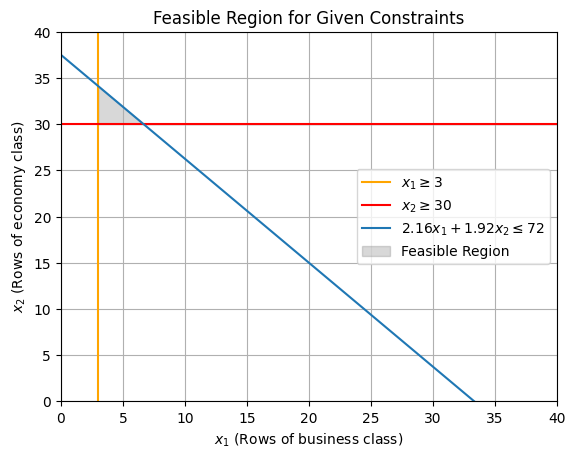

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
c1, c2 = 60000, 30000                 # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 1, 0, 3                # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 0, 1, 30               # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 2.16, 1.92, 72         # Coefficients for constraint a31 * x1 + a32 * x2 <= b3

# Define the range of x1 values
x1 = np.linspace(0, 40, 400)

# Calculate x2 values for each constraint
x2_1 = np.full_like(x1, b1)   # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 >= b2
x2_3 = (b3 - a31 * x1) / a32  # From a11 * a31 * x1 + a32 * x2 >= b3

# Plot the constraints
plt.axvline(x=b1, label=fr'$x_1 \geq {b1}$', color='orange')
plt.axhline(y=b2, label=fr'$x_2 \geq {b2}$', color='red')
plt.plot(x1, x2_3, label=fr'${a31}x_1 + {a32}x_2 \leq {b3}$')

# Fill the feasible region
plt.fill_between(x1, x2_2, np.maximum(x2_2, x2_3), where=(x1 >= x2_1), color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel(r'$x_1$ (Rows of business class)')
plt.ylabel(r'$x_2$ (Rows of economy class)')
plt.legend()
plt.title("Feasible Region for Given Constraints")
plt.grid(True)

# Display the figure
plt.show()

4. Graphical Solution Method (draw separate figures for each question below)

    4.2. Draw the iso-cost lines through each corner point of the feasible region. (3)
    (Redraw the feasible region and then draw the iso-cost lines; Label each constraint as well as the iso-cost lines).

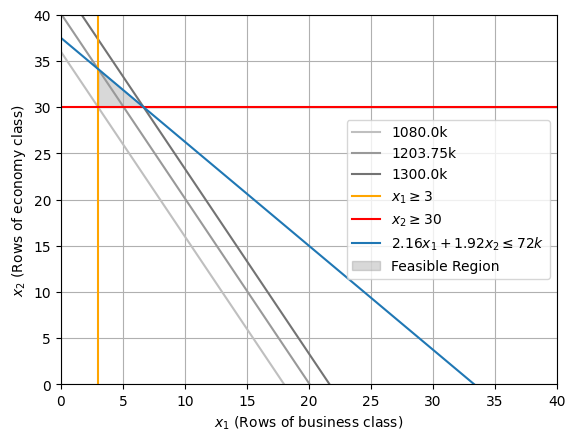

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define constraint coefficients
c1, c2 = 60000, 30000                 # Parameters for the objective function c1 * x1 + c2 * x2
a11, a12, b1 = 1, 0, 3                # Coefficients for constraint a11 * x1 + a12 * x2 >= b1
a21, a22, b2 = 0, 1, 30               # Coefficients for constraint a21 * x1 + a22 * x2 >= b2
a31, a32, b3 = 2.16, 1.92, 72         # Coefficients for constraint a31 * x1 + a32 * x2 <= b3

# Define set of isocost values (C)
C = [1080000, 1203750, 1300000]

for i,c in enumerate(C):
  # Calculate x2 value for iscost line c1 * x2 + c2 * x2 = c
  x2 = (c - c1 * x1) / c2
  # Plot the isocost lines
  plt.plot(x1, x2, color=str(0.75 - 0.15 * i), label=f'{c/1000}k')

# Define the range of x1 values
x1 = np.linspace(0, 40, 400)

# Calculate x2 values for each constraint
x2_1 = np.full_like(x1, b1)   # From a11 * x1 + a12 * x2 >= b1
x2_2 = np.full_like(x1, b2)   # From a21 * x1 + a22 * x2 >= b2
x2_3 = (b3 - a31 * x1) / a32  # From a11 * a31 * x1 + a32 * x2 >= b3

# Plot the constraints
plt.axvline(x=b1, label=fr'$x_1 \geq {b1}$', color='orange')
plt.axhline(y=b2, label=fr'$x_2 \geq {b2}$', color='red')
plt.plot(x1, x2_3, label=fr'${a31}x_1 + {a32}x_2 \leq {b3}k$')

# Fill the feasible region
plt.fill_between(x1, x2_2, np.maximum(x2_2, x2_3), where=(x1 >= x2_1), color='grey', alpha=0.3, label="Feasible Region")
                 
# Set plot attributes
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel(r'$x_1$ (Rows of business class)')
plt.ylabel(r'$x_2$ (Rows of economy class)')
plt.legend()
plt.grid(True)

# Display the figure
plt.show()

4. Graphical Solution Method (draw separate figures for each question below)
    
    4.3. Report the optimal solution for the standardised linear programming model. (1)

    $x_1, x_2 = 3, 30$

    <br>

    4.4. Classify each technical constraint as binding/non-binding. (1)

    Binding - $x_1 \geq 3; \ x_2 \geq 30$

    Non-binding - $2.16x_1 + 1.92x_2 \leq 72$

    <br>

5. Solution Inference

    5.1. How many rows of business and economy class seats should IndiGo configure? (1)

    IndiGo should configure 3 rows of business class and 30 rows of economy class.

    <br>

    5.1. Find the ratio of business to economy class seat installation cost $(c_1/c_2=r)$ that renders multiple optimal solutions? (1)

    No practical scenario would render multiple optimal solutions. 

    <br>

    5.2. For $c_1/c_2=1$ how many rows of business and economy class seats should IndiGo configure? (1)

    IndiGo should configure 3 rows of business class and 30 rows of economy class.